In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6) #To adjust the configuration of plots that will be created

df = pd.read_csv(r"C:\Users\lenovo\Documents\DATA SCIENCE\Portfolio\BRCA.csv")

In [2]:
df.sample(5)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
164,TCGA-A8-A086,59.0,FEMALE,0.005649,1.48180,0.31711,0.32139,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,09-Jul-18,09-Aug-19,Alive
172,TCGA-A7-A56D,84.0,FEMALE,-0.230320,1.13040,0.16642,1.18410,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,22-Mar-19,15-Sep-19,Alive
221,TCGA-C8-A12O,50.0,FEMALE,-0.322890,0.98848,-0.29313,-0.26170,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,NaN,NaN
255,TCGA-AO-A12E,51.0,FEMALE,0.090487,-0.63873,2.19340,-0.83843,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,24-Feb-19,05-Dec-20,Alive
242,TCGA-A8-A09D,47.0,FEMALE,-0.361770,1.11370,0.31335,-0.57385,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,25-Jan-19,25-Feb-20,Alive


In [3]:
df.shape

(341, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [5]:
df['Age'].isnull().any()

True

In [6]:
df.dtypes

Patient_ID             object
Age                   float64
Gender                 object
Protein1              float64
Protein2              float64
Protein3              float64
Protein4              float64
Tumour_Stage           object
Histology              object
ER status              object
PR status              object
HER2 status            object
Surgery_type           object
Date_of_Surgery        object
Date_of_Last_Visit     object
Patient_Status         object
dtype: object

In [7]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [8]:
df.dropna(subset=['Age'], inplace = True)

In [9]:
df.shape

(334, 16)

Based on the dataset description:

1) Protein 1-4 is the expression of the proteins

2) DateofSurgery: Date on which surgery was performed (in DD-MON-YY)

3) DateofLast_Visit: Date of last visit (in DD-MON-YY); can be null, in case the patient didn’t visited again after the surgery.

4) Patient_Status: Alive/Dead; can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead.

In [10]:
df.describe()

#youngest patient is 29 years old. Quite shocking. It is interesting to see their protein expression later on.

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [11]:
#Let's make a new column to categorize different age range.

df['Age_group'] = 0
df.loc[(df['Age'] >=21) & (df['Age']<=30), 'Age_group'] = 0
df.loc[(df['Age'] >=31) & (df['Age']<=40), 'Age_group'] = 1
df.loc[(df['Age'] >=41) & (df['Age']<=50), 'Age_group'] = 2
df.loc[(df['Age'] >=51) & (df['Age']<=60), 'Age_group'] = 3
df.loc[(df['Age'] >=61) & (df['Age']<=70), 'Age_group'] = 4
df.loc[(df['Age'] >=71) & (df['Age']<=80), 'Age_group'] = 5
df.loc[(df['Age'] >=81) & (df['Age']<=90), 'Age_group'] = 6

<AxesSubplot:xlabel='Age_group', ylabel='count'>

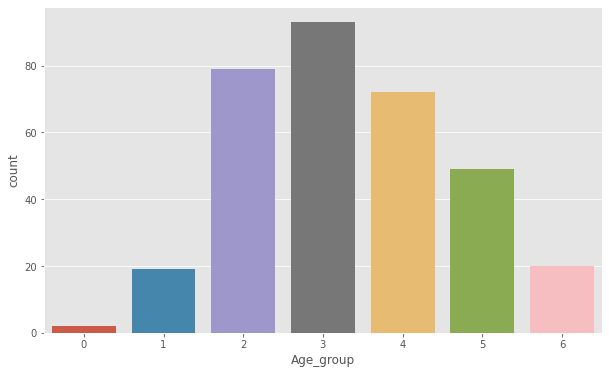

In [12]:
sns.countplot(x = 'Age_group', data= df)

In [13]:
pd.crosstab([df.Tumour_Stage, df.Patient_Status], [df.Age_group], margins=True)

Age_group                    0   1   2   3   4   5   6  All
Tumour_Stage Patient_Status                                
I            Alive           0   1  10  13  14  10   3   51
             Dead            1   1   1   0   2   3   2   10
II           Alive           1   8  32  43  30  22   8  144
             Dead            0   1   7  11  13   4   2   38
III          Alive           0   6  16  18  10   6   4   60
             Dead            0   1   9   5   1   2   0   18
All                          2  18  75  90  70  47  19  321

Many patients are aged between 51 to 60 years old, and least patients from 21 to 30 age group (with the youngest patients being 29 years old).

From the crosstable:
- many patients are in Stage II. 
- For all tumour stages, most frequent age range is 41 - 70 years old, and accordingly, death counts is higher in those age groups. However in Stage I there are no death reported for age_group 3.


In [14]:
# Curious if there is any male patients and count them

df['Gender'].value_counts()

FEMALE    330
MALE        4
Name: Gender, dtype: int64

In [ ]:
# Interesting to know:

# 1) Protein expression and Tumour stage (correlation)
# 2) Protein expression with HER2, ER and PR gene status (Correlation)
# 3) Surgery type and Tumour Stage (This type of surgery is usually performed on which stage tumour.

In [15]:
#Dropping unnecessary columns for analysis

df.drop(['Date_of_Surgery','Patient_ID','Date_of_Last_Visit'], axis = 1, inplace = True)

In [16]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Age_group
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,1
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead,2
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,4
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,3
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead,3


In [17]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Patient_Status', 'Age_group'],
      dtype='object')

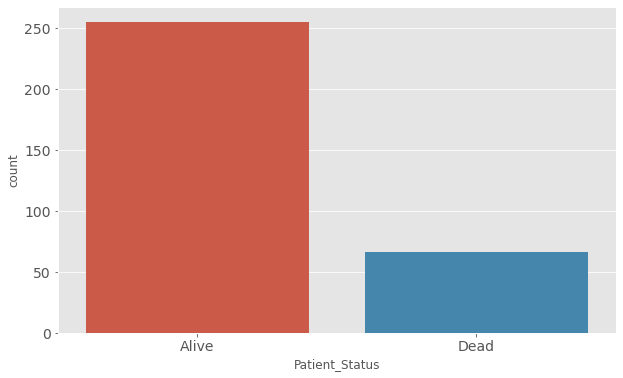

In [18]:
sns.countplot(x = 'Patient_Status', data= df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
print('counts of ER status is: ', df['ER status'].value_counts())
print('counts of PR status is: ', df['PR status'].value_counts())
print('counts of HER2 status is: ', df['HER2 status'].value_counts())

counts of ER status is:  Positive    334
Name: ER status, dtype: int64
counts of PR status is:  Positive    334
Name: PR status, dtype: int64
counts of HER2 status is:  Negative    305
Positive     29
Name: HER2 status, dtype: int64


In [20]:
print ("Unique values for PR status are: ", df['PR status'].unique())
print ("Unique values for ER status are: ", df['ER status'].unique())
print ("Unique values for HER2 status are: ", df['HER2 status'].unique())
print ("Unique values for Histology status are: ", df['Histology'].unique())
print ("Unique values for Surgery type are: ", df['Surgery_type'].unique())

Unique values for PR status are:  ['Positive']
Unique values for ER status are:  ['Positive']
Unique values for HER2 status are:  ['Negative' 'Positive']
Unique values for Histology status are:  ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
Unique values for Surgery type are:  ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']


In [21]:
#for # 2) Protein expression with HER2, ER and PR gene status (Correlation),
# PR and ER are dropped because they have only one value for all rows ('Positive')

df.drop(['PR status','ER status'], axis =1 , inplace = True)

In [22]:
dfc = df.copy()
dfc

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Age_group
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,1
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,2
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,4
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,3
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,3
...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Simple Mastectomy,Dead,1
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Negative,Other,Dead,2
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Dead,4
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Dead,5


In [23]:
dfc['Gender'].replace(['FEMALE', 'MALE'], [0,1], inplace = True)
dfc['HER2 status'].replace(['Positive', 'Negative'], [1,0], inplace = True)
dfc['Patient_Status'].replace(['Alive', 'Dead'], [1,0], inplace = True)
dfc['Tumour_Stage'].replace(['I', 'II', 'III'], [1,2,3], inplace = True)
dfc['Histology'].replace(['Infiltrating Ductal Carcinoma', 'Mucinous Carcinoma', 'Infiltrating Lobular Carcinoma'], [1,2,3], inplace = True)
dfc['Surgery_type'].replace(['Modified Radical Mastectomy', 'Lumpectomy', 'Simple Mastectomy','Other'], [1,2,3,0], inplace = True)
dfc

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Age_group
0,36.0,0,0.080353,0.42638,0.54715,0.273680,3,1,0,1,1.0,1
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,2,2,0,2,0.0,2
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,3,1,0,0,1.0,4
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,2,1,0,1,1.0,3
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,2,1,0,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0,0.231800,0.61804,-0.55779,-0.517350,3,1,1,3,0.0,1
330,44.0,1,0.732720,1.11170,-0.26952,-0.354920,2,3,0,0,0.0,2
331,61.0,0,-0.719470,2.54850,-0.15024,0.339680,2,1,0,2,0.0,4
332,79.0,0,0.479400,2.05590,-0.53136,-0.188480,1,1,1,2,0.0,5


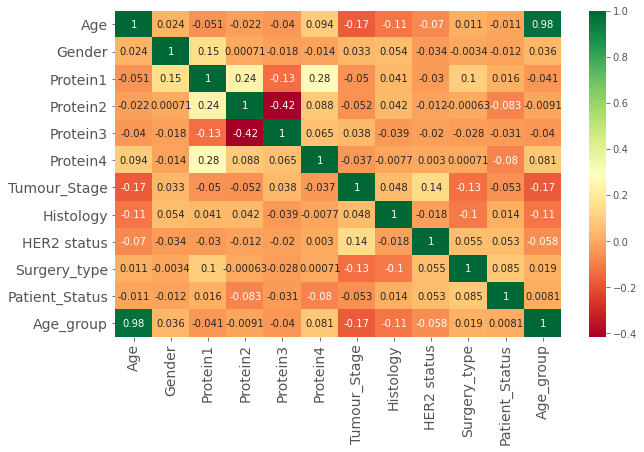

In [24]:
#correlation of numerical data

sns.heatmap(dfc.corr(), annot=True, cmap='RdYlGn')
fig= plt.gcf()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

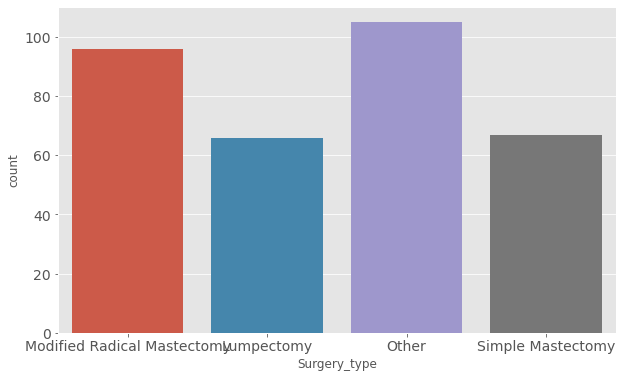

In [25]:
sns.countplot(x = 'Surgery_type', data= df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [26]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4,Age_group
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819,3.320359
std,12.961212,0.563588,0.911637,0.585175,0.629055,1.327376
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500,0.000000
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090,2.000000
50%,58.000000,0.006129,0.992805,-0.173180,0.041768,3.000000
75%,68.000000,0.343598,1.627900,0.278353,0.425630,4.000000
max,90.000000,1.593600,3.402200,2.193400,1.629900,6.000000


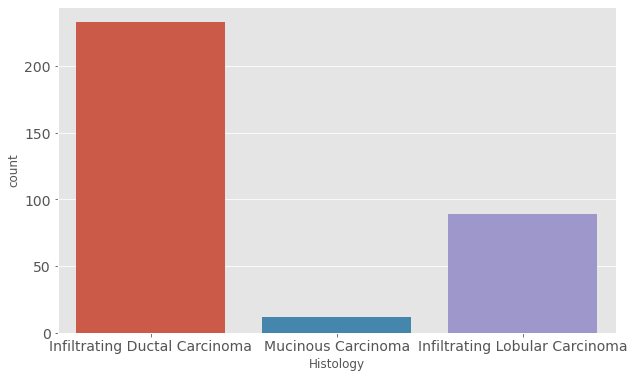

In [27]:
sns.countplot(x = 'Histology', data= df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [28]:
pd.crosstab([df.Tumour_Stage,df.Histology], [df.Surgery_type], margins=True)

Surgery_type                                 Lumpectomy  \
Tumour_Stage Histology                                    
I            Infiltrating Ductal Carcinoma           17   
             Infiltrating Lobular Carcinoma           3   
             Mucinous Carcinoma                       2   
II           Infiltrating Ductal Carcinoma           25   
             Infiltrating Lobular Carcinoma           8   
             Mucinous Carcinoma                       3   
III          Infiltrating Ductal Carcinoma            6   
             Infiltrating Lobular Carcinoma           2   
All                                                  66   

Surgery_type                                 Modified Radical Mastectomy  \
Tumour_Stage Histology                                                     
I            Infiltrating Ductal Carcinoma                             6   
             Infiltrating Lobular Carcinoma                            1   
             Mucinous Carcinoma                                        1   
II           Infiltrating Ductal Carcinoma                            30   
             Infiltrating Lobular Carcinoma                           15   
             Mucinous Carcinoma                                        4   
III          Infiltrating Ductal Carcinoma                            28   
             Infiltrating Lobular Carcinoma                           11   
All                                                                   96   

Surgery_type                                 Other  Simple Mastectomy  All  
Tumour_Stage Histology                                                      
I            Infiltrating Ductal Carcinoma      18                  9   50  
             Infiltrating Lobular Carcinoma      2                  5   11  
             Mucinous Carcinoma                  0                  0    3  
II           Infiltrating Ductal Carcinoma      36                 33  124  
             Infiltrating Lobular Carcinoma     25                  8   56  
             Mucinous Carcinoma                  0                  2    9  
III          Infiltrating Ductal Carcinoma      16                  9   59  
             Infiltrating Lobular Carcinoma      8                  1   22  
All                                            105                 67  334

Most patients were Stage II type of Breast cancer. 
For Stage I tumor, 'Other' procedure was done, and a procedure of removing the lump were much preferred. This can be due to the cancer tissue had not metastatise yet.
For Stage II and Stage III tumor, a more frequent procedure is the Modified Radical Mastectomy, which could indicate the cancer tissue was deeper and many more tissues needed to be removed.
For all types of histology, Infiltrating Ductal carcinoma is the most frequent, also as seen in the countplot.

In [29]:
df.loc[df['Gender']=='MALE']

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Age_group
5,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,6
152,51.0,MALE,0.837890,0.50642,-0.545130,0.314900,II,Infiltrating Lobular Carcinoma,Negative,Simple Mastectomy,Alive,3
271,68.0,MALE,1.470400,0.46900,0.135540,-0.289840,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,4
330,44.0,MALE,0.732720,1.11170,-0.269520,-0.354920,II,Infiltrating Lobular Carcinoma,Negative,Other,Dead,2


There are 4 male patients, aged 44 to 84 years old. 75% are of type II tumour stage.All patients have Infiltrating Ductal Carcinoma. And one was reported dead.

In [30]:
# Since Age column has been simplified to Age_group, we can dismiss this column.

dfc.drop(['Age'], axis =1, inplace = True)

In [31]:
dfc.columns

Index(['Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type',
       'Patient_Status', 'Age_group'],
      dtype='object')

In [32]:
# So now we can predict the survival of the patients based on available variables, 
# using different classification models and compare their accuracy.

#Importing necessary libraries

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [33]:
dfc.dropna(subset=['Patient_Status'], inplace = True)
dfc.isnull().sum()

Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
HER2 status       0
Surgery_type      0
Patient_Status    0
Age_group         0
dtype: int64

In [40]:
X = dfc.drop('Patient_Status',axis=1)
Y = dfc['Patient_Status']   
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

train,test=train_test_split(dfc,test_size=0.2,random_state=42,stratify=dfc['Patient_Status'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=dfc[dfc.columns[1:]]
Y=dfc['Patient_Status']

In [41]:
# Logistic regression

lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
prediction1= lr_model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,Y_test))

The accuracy of the Logistic Regression is 0.8041237113402062


In [42]:
# KNN

knn_model = KNeighborsClassifier()
knn_model.fit(X_train,Y_train)
prediction2 = knn_model.predict(X_test)
print("The accuracy of KNN model is", metrics.accuracy_score(prediction2, Y_test))

The accuracy of KNN model is 0.7525773195876289


In [43]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train,Y_train)
prediction3 = rf_model.predict(X_test)
print("The accuracy of Random Forest model is", metrics.accuracy_score(prediction3, Y_test))

The accuracy of Random Forest model is 0.7731958762886598


# Cross validation

In [44]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Random Forest']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
cv_df=pd.DataFrame({'CV Mean':xyz,'Std':std, 'Accuracy': accuracy},index=classifiers)       
cv_df


,CV Mean,Std,Accuracy
Logistic Regression,0.794413,0.117871,"[0.7878787878787878, 0.8125, 0.8125, 0.5625, 0..."
KNN,0.760038,0.122808,"[0.7878787878787878, 0.75, 0.75, 0.5625, 0.843..."
Random Forest,0.785038,0.113922,"[0.7878787878787878, 0.8125, 0.8125, 0.5625, 0..."


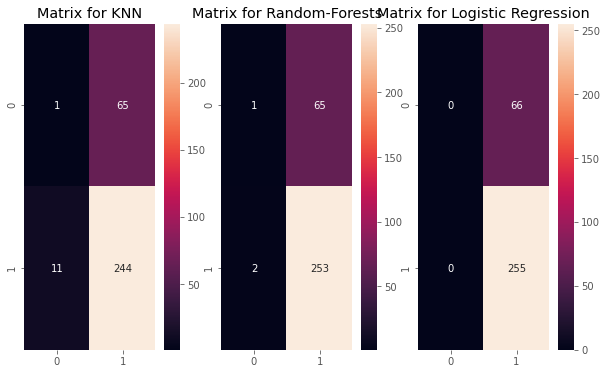

In [45]:
#Confusion matrix

f,ax = plt.subplots(1,3)
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0],annot=True,fmt='g')
ax[0].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1],annot=True,fmt='g')
ax[1].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2],annot=True,fmt='g')
ax[2].set_title('Matrix for Logistic Regression')
plt.show()